In [58]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

### Initializing Dataset  

In [59]:
# Read the data from the xlsx file
df_rawData = pd.read_excel('autoMPG_data.xlsx')

In [60]:
# Checking to see how many rows we have in this dataset
df_rawData.shape[0]

392

In [61]:
df_rawData

,GallonsPer100Miles,GallonsPer100MilesTo1981,MPG,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year,Year70To81,Origin,Origin.Eq.1,Origin.Eq.2,Origin.Eq.3,Name
0,5.555556,5.555556,18.0,8,3.07,1.30,3.504,12.0,70,1,1,1,0,0,chevrolet chevelle malibu
1,6.666667,6.666667,15.0,8,3.50,1.65,3.693,11.5,70,1,1,1,0,0,buick skylark 320
2,5.555556,5.555556,18.0,8,3.18,1.50,3.436,11.0,70,1,1,1,0,0,plymouth satellite
3,6.250000,6.250000,16.0,8,3.04,1.50,3.433,12.0,70,1,1,1,0,0,amc rebel sst
4,5.882353,5.882353,17.0,8,3.02,1.40,3.449,10.5,70,1,1,1,0,0,ford torino
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,3.703704,NaN,27.0,4,1.40,0.86,2.790,15.6,82,0,1,1,0,0,ford mustang gl
388,2.272727,NaN,44.0,4,0.97,0.52,2.130,24.6,82,0,2,0,1,0,vw pickup
389,3.125000,NaN,32.0,4,1.35,0.84,2.295,11.6,82,0,1,1,0,0,dodge rampage
390,3.571429,NaN,28.0,4,1.20,0.79,2.625,18.6,82,0,1,1,0,0,ford ranger


before you build your linear regression model, remember to first study the variables one by one to understand your data. This includes: checking for any missing values, using describe(), info(), making graphs, etc.

### Analyzing Variables

In [62]:
# Describe the dataset (can get the mean of the rows to replace the nan values)
df_rawData.describe()

,GallonsPer100Miles,GallonsPer100MilesTo1981,MPG,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year,Year70To81,Origin,Origin.Eq.1,Origin.Eq.2,Origin.Eq.3
count,392.000000,362.000000,392.000000,392.000000,392.00000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,4.782243,4.912568,23.445918,5.471939,1.94412,1.044694,2.977584,15.541327,75.979592,0.923469,1.576531,0.625000,0.173469,0.201531
std,1.663944,1.659047,7.805007,1.705783,1.04644,0.384912,0.849403,2.758864,3.683737,0.266185,0.805518,0.484742,0.379136,0.401656
min,2.145923,2.145923,9.000000,3.000000,0.68000,0.460000,1.613000,8.000000,70.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,3.448276,3.571429,17.000000,4.000000,1.05000,0.750000,2.225250,13.775000,73.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,4.396135,4.651163,22.750000,4.000000,1.51000,0.935000,2.803500,15.500000,76.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,5.882353,6.024744,29.000000,8.000000,2.75750,1.260000,3.614750,17.025000,79.000000,1.000000,2.000000,1.000000,0.000000,0.000000
max,11.111111,11.111111,46.600000,8.000000,4.55000,2.300000,5.140000,24.800000,82.000000,1.000000,3.000000,1.000000,1.000000,1.000000


In [63]:
# Drop the columns with the nan variables. 
#dropped = df_rawData.dropna()
df_rawData = df_rawData.dropna()

In [64]:
# Find out how many rows the dataset would have after the nan rows have been dropped. 
df_rawData.shape[0]

362

In [65]:
# IRRELEVANT
# Make a new table of all the tables that have null characters
#nan_rows = df_rawData.isnull().any(axis=1)
#nan_rows.shape[0]

In [66]:
#nan_rows

In [67]:
#empty_rows = df_rawData.loc[nan_rows]
#empty_rows.shape[0]

In [68]:
#empty_rows

In [69]:
# Handling missing (null) values by filling in with the median
#empty_rows['GallonsPer100MilesTo1981'].fillna(df_rawData['GallonsPer100MilesTo1981'].median(), inplace=True)

##  Histograms

<Axes: xlabel='X', ylabel='%, n='>

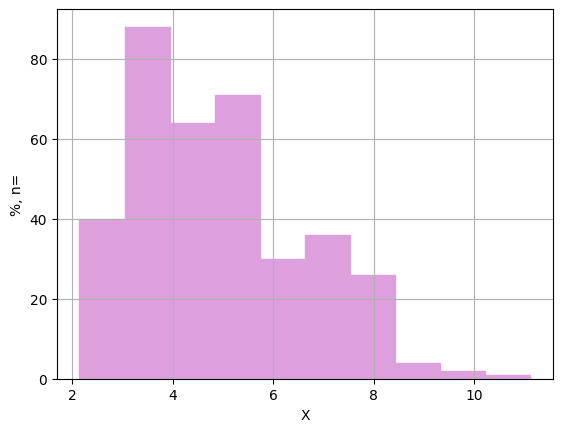

In [70]:
df_histogram = df_rawData['GallonsPer100Miles'].hist( color="plum", edgecolor="plum")
plt.xlabel('X')
plt.ylabel('%, n=')

df_histogram

<Axes: xlabel='X', ylabel='%, n='>

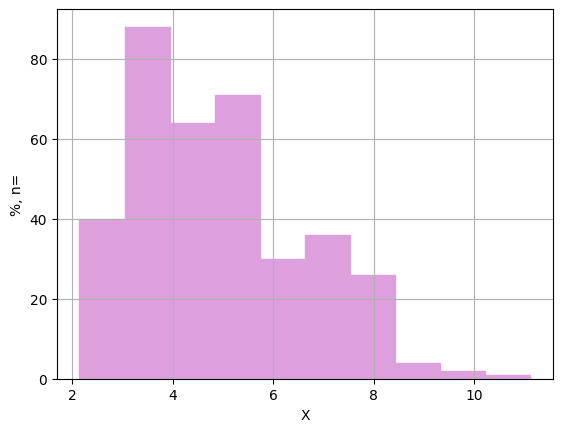

In [71]:
df_histogram = df_rawData['GallonsPer100MilesTo1981'].hist( color="plum", edgecolor="plum")
plt.xlabel('X')
plt.ylabel('%, n=')

df_histogram

<Axes: xlabel='X', ylabel='%, n='>

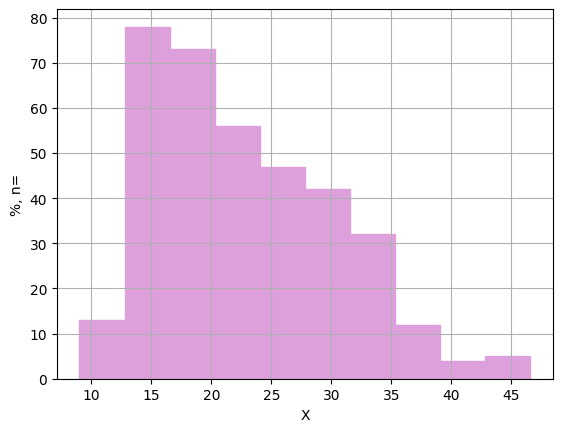

In [72]:
df_histogram = df_rawData['MPG'].hist( color="plum", edgecolor="plum")
plt.xlabel('X')
plt.ylabel('%, n=')

df_histogram

<Axes: xlabel='X', ylabel='%, n='>

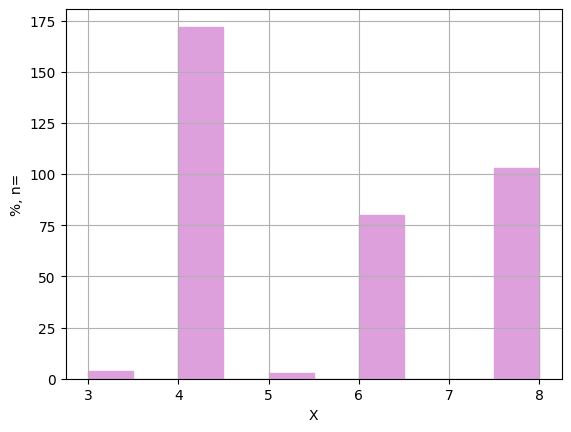

In [73]:
df_histogram = df_rawData['Cylinders'].hist( color="plum", edgecolor="plum")
plt.xlabel('X')
plt.ylabel('%, n=')

df_histogram

<Axes: xlabel='X', ylabel='%, n='>

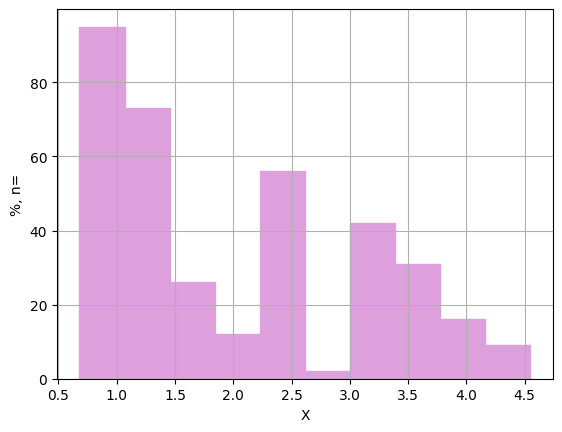

In [74]:
df_histogram = df_rawData['Displacement100ci'].hist( color="plum", edgecolor="plum")
plt.xlabel('X')
plt.ylabel('%, n=')

df_histogram

<Axes: xlabel='X', ylabel='%, n='>

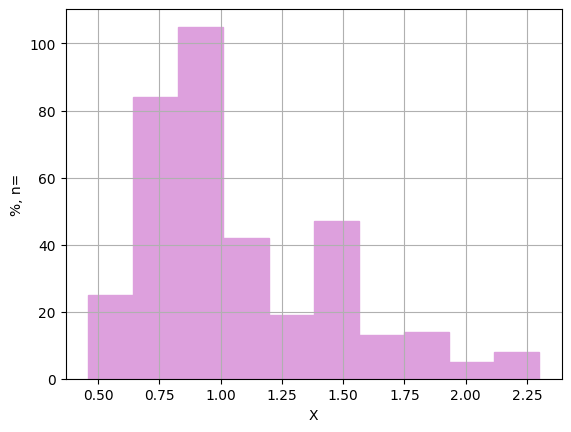

In [75]:
df_histogram = df_rawData['Horsepower100'].hist( color="plum", edgecolor="plum")
plt.xlabel('X')
plt.ylabel('%, n=')

df_histogram

<Axes: xlabel='X', ylabel='%, n='>

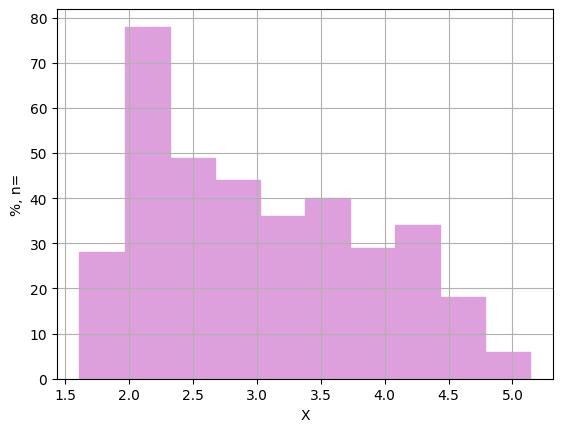

In [76]:
df_histogram = df_rawData['Weight1000lb'].hist( color="plum", edgecolor="plum")
plt.xlabel('X')
plt.ylabel('%, n=')

df_histogram

<Axes: xlabel='X', ylabel='%, n='>

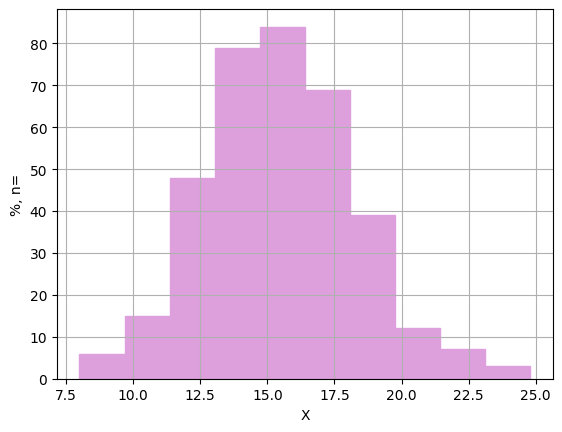

In [77]:
df_histogram = df_rawData['Seconds0to60'].hist( color="plum", edgecolor="plum")
plt.xlabel('X')
plt.ylabel('%, n=')

df_histogram

<Axes: xlabel='X', ylabel='%, n='>

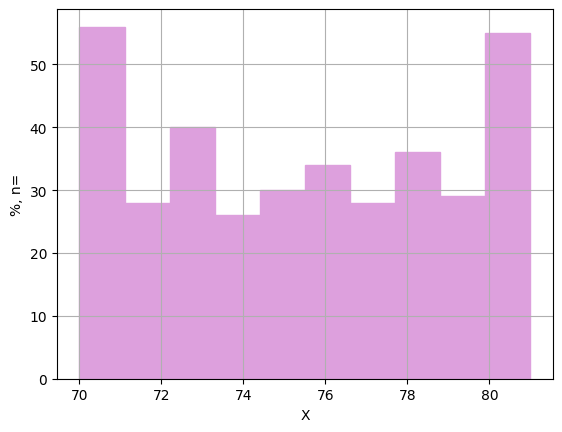

In [78]:
df_histogram = df_rawData['Year'].hist( color="plum", edgecolor="plum")
plt.xlabel('X')
plt.ylabel('%, n=')

df_histogram

Data Preproccessing
___


In [79]:
# Later when we want to replace nan values 

### Visualize
___

Create scatter plots of 'Area', 'Bedrooms', and 'Age' against 'Price', with a regression line fitted to each plot.

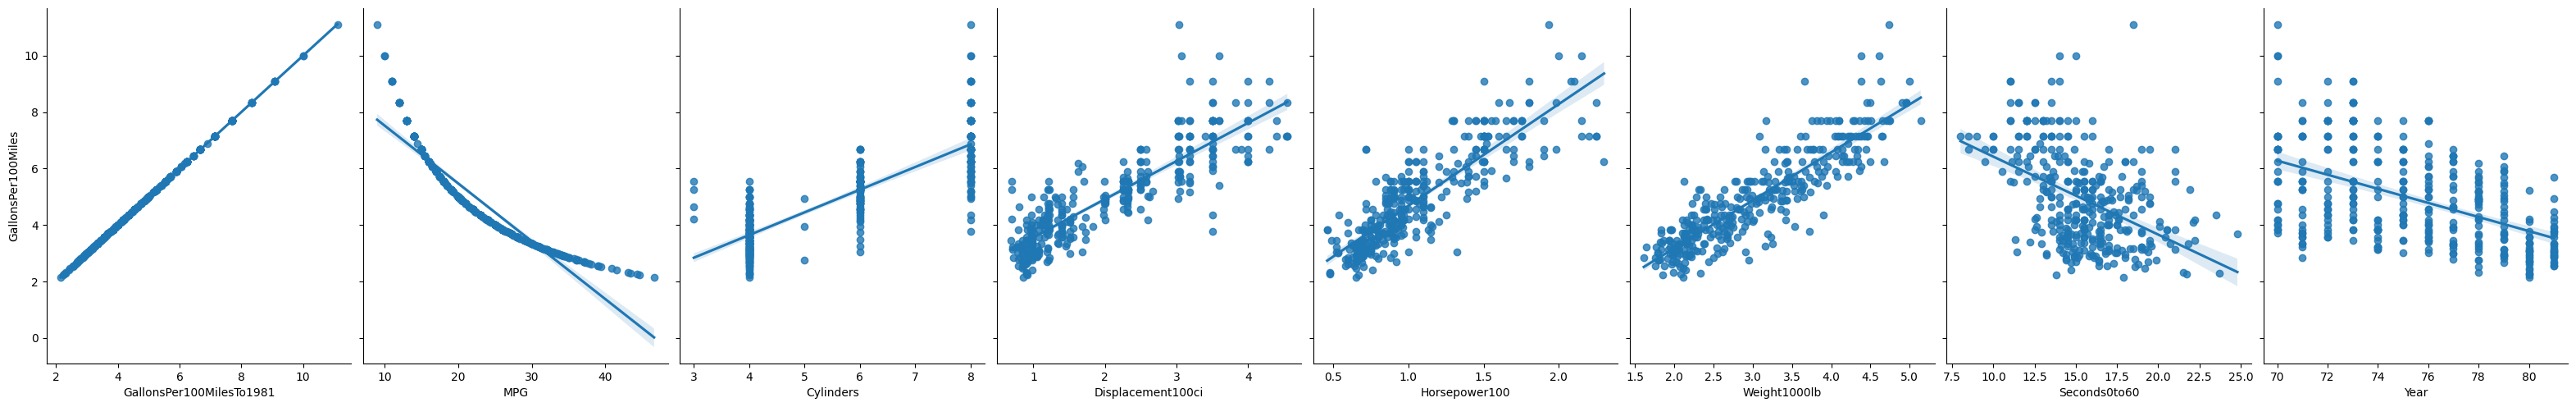

In [80]:
import seaborn as sns

# Visualizing the relationship between features and the target variable
sns.pairplot(df_rawData, x_vars=['GallonsPer100MilesTo1981', 'MPG', 'Cylinders', 'Displacement100ci', 'Horsepower100', 'Weight1000lb', 'Seconds0to60','Year'], y_vars='GallonsPer100Miles', height=5, aspect=0.8, kind='reg')

## Test

### Simple Linear Regression

Here we experiment with some value using simple linear regression

In [81]:
filtered_df = df_rawData[[ 'Cylinders', 'Displacement100ci', 'Horsepower100', 'Weight1000lb']]

# Selecting our comaprison variable
#x = df_rawData.GallonsPer100MilesTo1981
x = df_rawData.Year

# Selecting our target
y = df_rawData.GallonsPer100Miles

In [82]:
# Starting training and testing split

from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)

In [83]:
# Utilizing Linear regression
# reshaping values

reg = LinearRegression().fit(x_train.values.reshape(-1, 1), y_train)


## Evaluating Prediction Error metrics

In [84]:
# First import the necessary items from the library

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [85]:
# Evaluating error

y_pred = reg.predict(x_test.values.reshape(-1,1))

print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

1.1694228459282443
1.9264189377779823


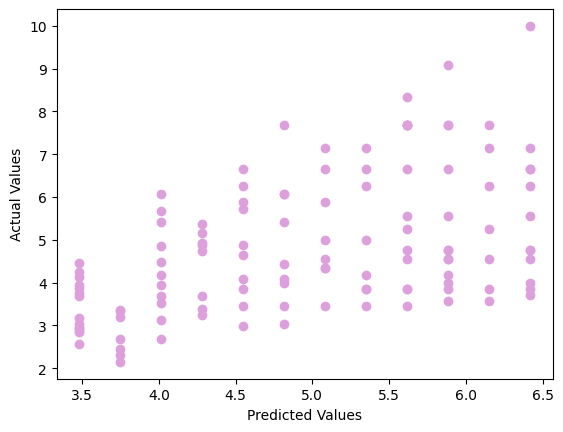

In [86]:
# Creating visualization for our error metrics

fig, ax = plt.subplots()

ax.scatter(y_pred, y_test, color = 'plum')

# Set axis labels and plot title
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')

plt.show()

## Multiple Linear Regression

In [87]:

#Filter the data
filtered_df = df_rawData[['Cylinders', 'Displacement100ci', 'Horsepower100', 'Weight1000lb']]
#filtered_df = df_rawData[['MPG', 'Cylinders', 'Displacement100ci', 'Horsepower100', 'Weight1000lb', 'Seconds0to60', 'Year']]

# Selecting our target
y = df_rawData.GallonsPer100Miles


In [88]:
# setting our Target

target_df = df_rawData['GallonsPer100Miles'] 

In [89]:
# Creating the model
model = LinearRegression()

In [90]:
# Fitting the model. x and y
model.fit(filtered_df, target_df)

LinearRegression()

In [91]:
# Coefficients and Intercept
coefficients = model.coef_
intercept = model.intercept_

In [92]:
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [0.09214462 0.00591465 1.37768921 0.98837161]
Intercept: -0.06617550597410204


## Predicting values

*R-squared*

In [93]:
# R-squared is a measure of the proportion of variance explained by the linear relationship
# Making predictions
predictions = model.predict(filtered_df)

# Model Evaluation (R-squared)
r_squared = model.score(filtered_df, target_df)
print("R-squared:", r_squared) 

# R-squared is commonly used as a measure to quantify how
# # well a linear model captures the variability in the data.



R-squared: 0.8167136685262504


In [94]:
filtered_df

,Cylinders,Displacement100ci,Horsepower100,Weight1000lb
0,8,3.07,1.30,3.504
1,8,3.50,1.65,3.693
2,8,3.18,1.50,3.436
3,8,3.04,1.50,3.433
4,8,3.02,1.40,3.449
...,...,...,...,...
357,6,1.46,1.20,2.930
358,6,2.31,1.10,3.415
359,8,3.50,1.05,3.725
360,6,2.00,0.88,3.060


In [95]:
# Test prediction data 
test_data = {

    'Cylinders': [8, 8, 6],
    'Displacement100ci': [3.07, 3.18, 2.31],
    'Horsepower100': [1.30, 1.65, 3.433],
    'Weight1000lb': [3.504, 3.504, 5],

}

# Convert test data to DataFrame
test_df = pd.DataFrame(test_data)

# Making prediction using the trained model
predicted_prices = model.predict(test_df)

# Display the predicted prices
for i, price in enumerate(predicted_prices):
    print(f"Predicted  {i+1}: {price}")

Predicted  1: 5.943389548371358
Predicted  2: 6.426231381481678
Predicted  3: 10.171820179668504


*R relationship*

In [96]:
# R relationship is a measure of the strength and direction of the linear relationship
# 0 = no relationship, 1 or -1 = 100% related

from scipy import stats

# These are closely related
x = df_rawData['GallonsPer100Miles']
y = df_rawData['Horsepower100']

slope, intercept, r, p, std_err = stats.linregress(x, y)

print(r)

0.8530232264828821


In [97]:
# Isn't as closely related as gallons per miles and horsepower
x = df_rawData['GallonsPer100Miles']
y = df_rawData['Year']

slope, intercept, r, p, std_err = stats.linregress(x, y)

print(r)

-0.5087364411013484


*Another way of predicting*

In [98]:
x = df_rawData['GallonsPer100Miles']
y = df_rawData['Cylinders']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

cylinders = myfunc(8)

print(cylinders)


8.260315652200756
